## Import the dataset

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94)
  
# data (as pandas dataframes) 
X_all_features = spambase.data.features

# only select features that interest us
selected_features = ['word_freq_will', 'word_freq_remove', 'word_freq_you', 'word_freq_free', 'char_freq_!', 'char_freq_$']
X = X_all_features[selected_features]

# define y which contains the information whether the email is spam
y = spambase.data.targets

In [2]:
# print the features
X

,word_freq_will,word_freq_remove,word_freq_you,word_freq_free,char_freq_!,char_freq_$
0,0.64,0.00,1.93,0.32,0.778,0.000
1,0.79,0.21,3.47,0.14,0.372,0.180
2,0.45,0.19,1.36,0.06,0.276,0.184
3,0.31,0.31,3.18,0.31,0.137,0.000
4,0.31,0.31,3.18,0.31,0.135,0.000
...,...,...,...,...,...,...
4596,1.88,0.00,0.62,0.00,0.000,0.000
4597,0.00,0.00,6.00,0.00,0.353,0.000
4598,1.80,0.00,1.50,0.00,0.000,0.000
4599,0.32,0.00,1.93,0.00,0.000,0.000


In [3]:
# print whether spam or not: 1 = spam, 0 = non-spam
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


## Split data into training and test data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train_spam = X_train[y_train["Class"] == 1]
X_train_nonspam = X_train[y_train["Class"] == 0]
X_test_spam = X_test[y_test["Class"] == 1]
X_test_nonspam = X_test[y_test["Class"] == 0]

n_training = len(X_train)
n_test = len(X_test)

## Exploratory histograms of training data

In [6]:
import matplotlib.pyplot as plt

Define a function to plot histograms.

In [7]:
def show_histogram(feature):
    # Create a figure with 2 subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot the first histogram with spam
    ax1.hist(X_train_spam[feature], bins=30, density=True) # density=True so that the area under the histogram sums to 1
    ax1.set_title(f"\"{feature}\": Spam")
    
    # Plot the second histogram with non-spam
    ax2.hist(X_train_nonspam[feature], bins=30, density=True) # density=True so that the area under the histogram sums to 1
    ax2.set_title(f"\"{feature}\": Non-Spam")
    
    plt.tight_layout()
    plt.show()

#### Occurences of "will"

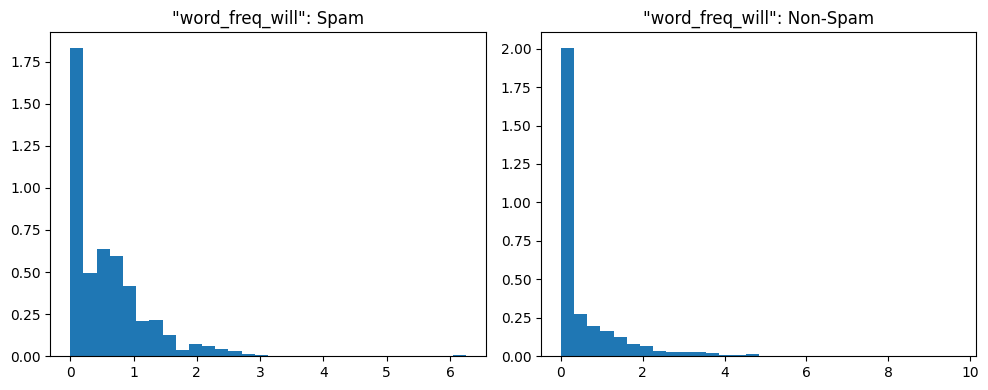

In [8]:
show_histogram('word_freq_will')

#### Occurences of "remove"

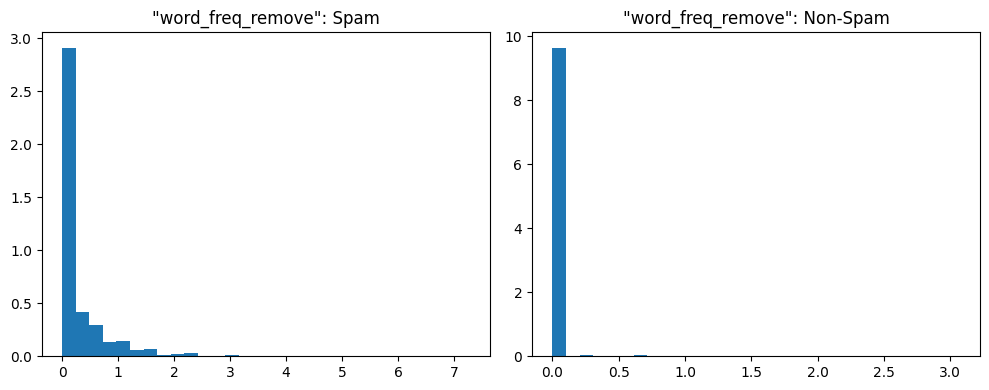

In [9]:
show_histogram('word_freq_remove')

#### Occurences of "you"

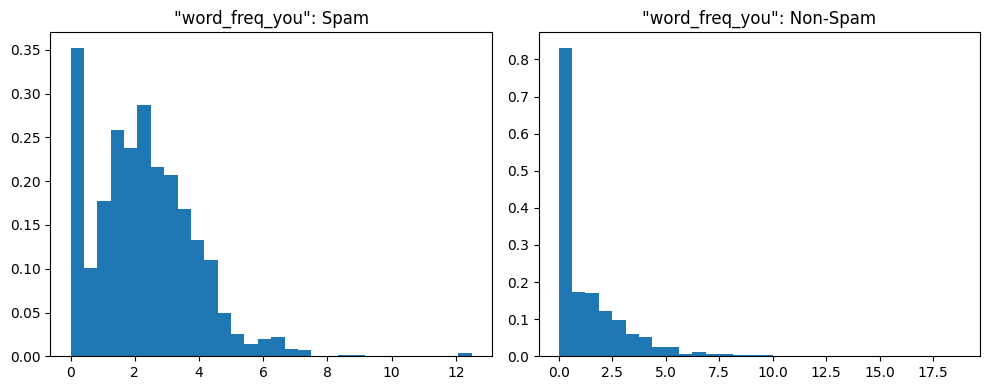

In [10]:
show_histogram('word_freq_you')

#### Occurences of "free"

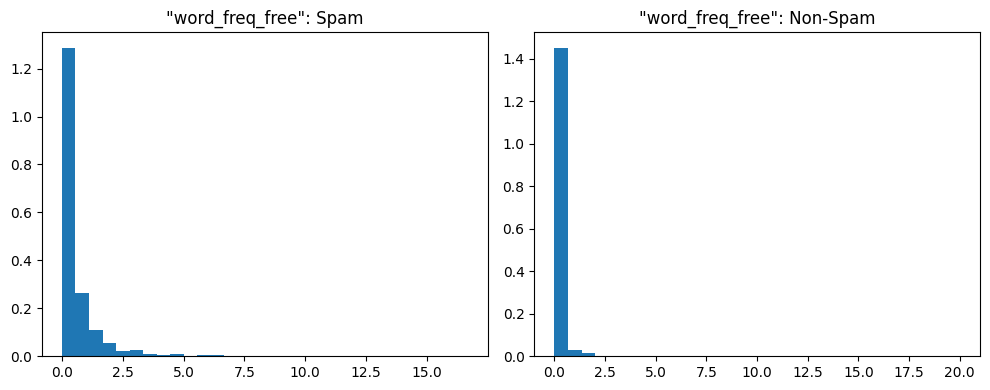

In [11]:
show_histogram('word_freq_free')

#### Occurences of "!"

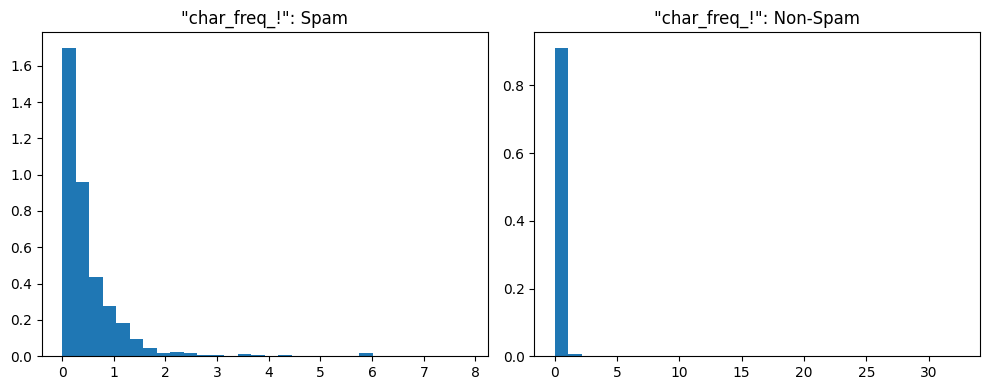

In [12]:
show_histogram('char_freq_!')

#### Occurences of "$"

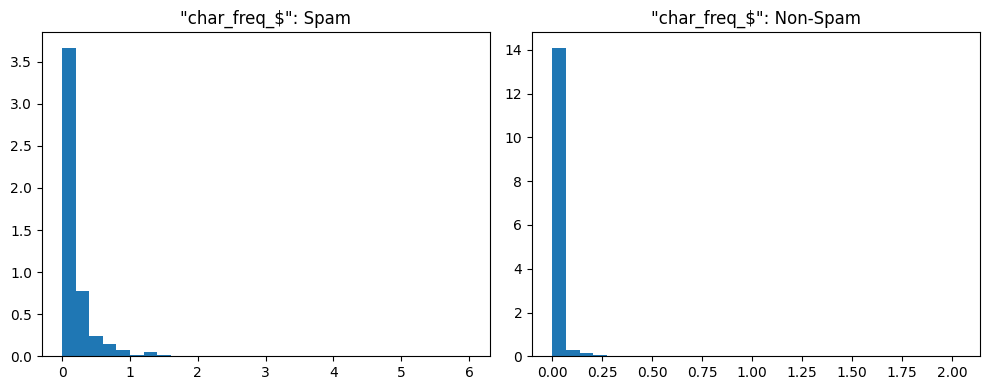

In [13]:
show_histogram('char_freq_$')

# Problem 4.1

![bayes theorem](./images/4_1.png)

We'll use the empirical values $P(S)=0.9$ and $P(S^C)=0.1$ just like in the problem description.

In [14]:
p_S = 0.9
p_Sc = 0.1

## a)

Determine the estimated values $ \hat{p}(E|S) $, $ \hat{p}(E|S^C) $ and $ \hat{p}(S|E) $ for the event $ E = $ "contains at least 3% exclamation marks" analogous to the example above. So should we classify emails with the property $ E $ as spam if we use a threshold value of 98% for sorting?

*Note*: The event $ E $ does not have the exact form "contains a certain word (at least once)" discussed above; however, this does not change the general procedure.



In [15]:
event_threshold = 3 # 3% character count

First we get the amount of spam emails from the training set that contain more than 3% "!" chars of the total char count

In [16]:
spam_mails_containing_char = len(X_train_spam[X_train_spam["char_freq_!"] > event_threshold])
spam_mails_containing_char

21

Then we get the amount of normal emails from the training set that ontain more than 3% "!" chars of the total char count

In [17]:
normal_mails_containing_char = len(X_train_nonspam[X_train_nonspam["char_freq_!"] > event_threshold])
normal_mails_containing_char

10

Then we get the probability $\hat{p}(E|S)$ --> probability that a spam mail contains more than 3% of "!" chars

In [18]:
p_E_S = spam_mails_containing_char / len(X_train_spam)
p_E_S

0.014757554462403373

Then we get the probability $\hat{p}(E|S^C)$ --> probability that a normal mail contains more than 3% of "!" chars

In [19]:
p_E_Sc = normal_mails_containing_char / len(X_train_nonspam)
p_E_Sc

0.004430660168365086

Using the bayes theorem we can now calculate the probability $\hat{p}(S|E)$ --> probability that any email containing 3% of "!" chars is a spam mail

In [20]:

p_S_E = (p_E_S * p_S) / ((p_E_S * p_S) + (p_E_Sc * p_Sc))
p_S_E

0.967718005548964

No, we should not classify emails with 3% of the character count beeing "!" as spam emails, since the probability that an email containing 3% of "!" characters is at roughly 96.7% and we defined the threshold at 98%.